<a href="https://colab.research.google.com/github/Mursaleen7141/Happy-Birthday-App-/blob/main/Recommendation%20for%20e%20commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD



In [4]:
## Loading Dataset
amazon_ratings = pd.read_csv('/content/archive.zip')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [5]:
amazon_ratings.shape

(2023070, 4)

In [6]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


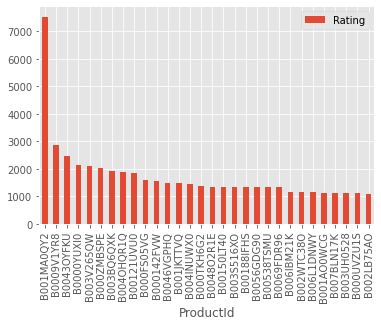

In [7]:
most_popular.head(30).plot(kind = "bar")

In [8]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [9]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,1304196046,1304196062,1304196070,1304196135,1304351475,1304482596,1304482634,1304482685,1304488608,1304495396,1304511073,1304511081,1304511111,130451112X,1304511138,1304511146,1304511154,1304622193,1304622223,1304622428,1304622452,1304622460,1304622622,1304622657,1304622665,...,B000052YMU,B000052YMV,B000052YMX,B000052YN5,B000052YN6,B000052YN7,B000052YN9,B000052YNA,B000052YNB,B000052YNE,B000052YOC,B000052YOG,B000052YOL,B000052YOM,B000052YOQ,B000052YOR,B000052YOS,B000052YOT,B000052YOU,B000052YOV,B000052YOX,B000052YOY,B000052YOZ,B000052YP0,B000052YP1,B000052YP3,B000052YP4,B000052YP6,B000052YP9,B000052YPC,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# As expected, the utility matrix obtaned above is sparce, filled up the unknown values wth 0.
ratings_utility_matrix.shape

(9697, 886)

In [11]:
# Transposing the matrix
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,A0870685EP51H0X8LFFU,A100AM334XZS3V,A100GYE1W4OXZ8,A100UD67AHFODS,A101GN97A47S1P,A10205RFE66H1R,A1029IITTU8289,A102LFZGD4MJXV,A1034GEUA8ZVFR,A103BJIOJSDJL1,A103FNP25GNMPH,A103PIRYKWQKR7,A103QH6R6A4FT1,A103QUZ016BQNJ,A103U3KR4L2ZXT,A1041053SID37WN8GTT8,A104CBA4A4HYOF,A104D62WJII6KP,A105C73RQ4YGCW,A1087Y8RJ4D422,A108HJD2ESJXUY,A108JE8E0CK1G3,A108LMMYNGL89M,A108V4O9Z78DB5,A10BXWWQPUDNCW,A10BZV61MNLBZD,A10C03UY4QEHJT,A10FEMX3ROQPTD,A10FXC2G4J7V6J,A10G0QS2B1S9J2,...,AZD8DMTDUVUDL,AZDHBUN122II4,AZDIZ674B4GVL,AZEIM64I6C7WW,AZG4Z8O02E9H4,AZG82XLVC98Y3,AZGGH4GS18RUN,AZGNXVV2ENZW8,AZHA72ZW5U8,AZJ8PVOKAJS5,AZJSE6RVOUU0E,AZKWPIG6RXKNG,AZLE2XFH3JUNG,AZLXFHIJ0J4VQ,AZLYAJ8XE443K,AZM0CLX6A5FFB,AZM3MWNYYPF0J,AZMS0XGWN43LW,AZMW54GPQ0WTQ,AZMWU0SO3H0DG,AZN3PS2PIZV06,AZNACMHVBRB5P,AZNOO10AO8G8V,AZP9CW7C6G8XO,AZPJ8ZDUN5HY8,AZSCK9QG6SMSB,AZSY5LHJ6LN7F,AZUFBU43ILNPC,AZUOLPXIGPG5O,AZW0RIARTTWWR,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# 5 rows × 9697 columns
X.shape

(886, 9697)

In [13]:
#Unique products in subset of data
X1 = X

In [14]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [15]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [16]:
# Isolating Product ID # 6117036094 from the Correlation Matrix
# Assuming the customer buys Product ID # 6117036094 (randomly chosen)
X.index[99]

'6117036094'

In [17]:
# Index # of product ID purchased by customer
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [18]:
# Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [19]:
# Recommending top 10 highly correlated products in sequence
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0733001998',
 '0737104473',
 '1304139220',
 '1304146537',
 '130414674X',
 '1304168522',
 '1304174778',
 '1304196046',
 '1304196062']

In [20]:
# Product Id # Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.


In [21]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [28]:
product_descriptions = pd.read_csv('/content/product_descriptions.csv.zip')
product_descriptions.shape

(124428, 2)

In [29]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [30]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [31]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

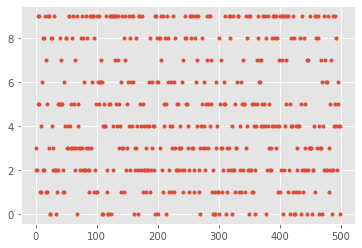

In [32]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [33]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

## Output
Recommendation of product based on the current product selected by user.
To recommend related product based on, Frequently bought together.

In [34]:
# Top words in each cluster based on product description
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 landscape
 pavestone
 kit
 design
 walls
 outdoor
 stones
 patio
 cutting
 edging
Cluster 1:
 wall
 painted
 wood
 moulding
 used
 trim
 ft
 outdoor
 post
 home
Cluster 2:
 tool
 tape
 easy
 heavy
 duty
 handle
 pull
 film
 telescoping
 ladder
Cluster 3:
 kitchen
 drawer
 nickel
 storage
 vanity
 soap
 hardware
 brass
 collection
 laminate
Cluster 4:
 water
 toilet
 heater
 tank
 gas
 easy
 year
 snow
 flush
 high
Cluster 5:
 concrete
 metal
 ft
 use
 seal
 sheet
 water
 garage
 coating
 roof
Cluster 6:
 air
 ft
 fan
 cooling
 control
 help
 light
 stake
 guide
 window
Cluster 7:
 lbs
 storage
 shelves
 steel
 commercial
 adjustable
 capacity
 shelf
 wall
 unit
Cluster 8:
 light
 volt
 watt
 led
 power
 lighting
 battery
 bulbs
 fixture
 m12
Cluster 9:
 door
 easy
 wood
 removal
 provides
 design
 hole
 installation
 doors
 install


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
# Predicting clusters based on key search words 
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [36]:
# Keyword : cutting tool
show_recommendations("cutting tool")

Cluster 2:
 tool
 tape
 easy
 heavy
 duty
 handle
 pull
 film
 telescoping
 ladder


In [37]:
# Keyword : spray paint
show_recommendations("spray paint")

Cluster 5:
 concrete
 metal
 ft
 use
 seal
 sheet
 water
 garage
 coating
 roof


In [38]:
# Keyword : steel drill
show_recommendations("steel drill")

Cluster 7:
 lbs
 storage
 shelves
 steel
 commercial
 adjustable
 capacity
 shelf
 wall
 unit


In [39]:
# Keyword : water
show_recommendations("water")

Cluster 4:
 water
 toilet
 heater
 tank
 gas
 easy
 year
 snow
 flush
 high
